In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.stats import kruskal, chi2_contingency

# Set plot style for better visuals
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [22]:
# Load the dataset
df = pd.read_csv('Wholesale customers data.csv')

# Show the first 10 rows
print("First 10 rows of the dataset:")
display(df.head(10))

# Show column types and non-null counts
print("\nColumn data types and info:")
df.info()

First 10 rows of the dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098



Column data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [23]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [24]:
# Report initial dimensions
print(f"Initial dataset dimensions: {df.shape}")

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {num_duplicates}")

# Remove duplicates if any exist
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
    print(f"New dataset dimensions: {df.shape}")
else:
    print("No duplicate rows to remove.")

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

Initial dataset dimensions: (440, 8)

Number of duplicate rows found: 0
No duplicate rows to remove.



First 5 rows of scaled spending data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314


Descriptive Statistics of Spending Categories:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


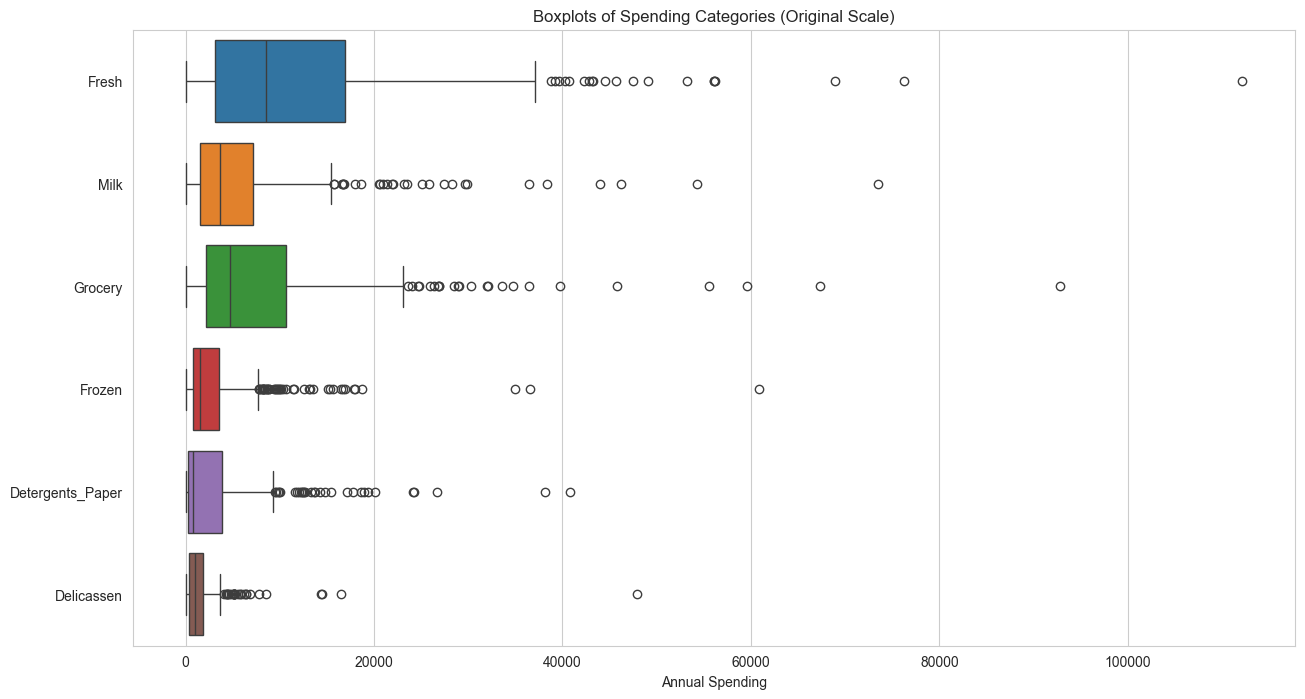


Outlier Counts per Category:
Fresh: 20 outliers
Milk: 28 outliers
Grocery: 24 outliers
Frozen: 43 outliers
Detergents_Paper: 30 outliers
Delicassen: 27 outliers


In [25]:
# Separate spending features for scaling
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_to_scale = df[spending_features]

# Initialize and apply RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_data, columns=spending_features)

print("\nFirst 5 rows of scaled spending data:")
display(scaled_df.head())

# First Exploratory Data Analysis (EDA)

# Descriptive stats on the original data
print("Descriptive Statistics of Spending Categories:")
display(df[spending_features].describe())

# Create boxplots to visualize distributions and outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[spending_features], orient='h')
plt.title('Boxplots of Spending Categories (Original Scale)')
plt.xlabel('Annual Spending')
plt.show()

# Count outliers using the IQR method
print("\nOutlier Counts per Category:")
for col in spending_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    print(f"{col}: {df[col][outlier_condition].count()} outliers")

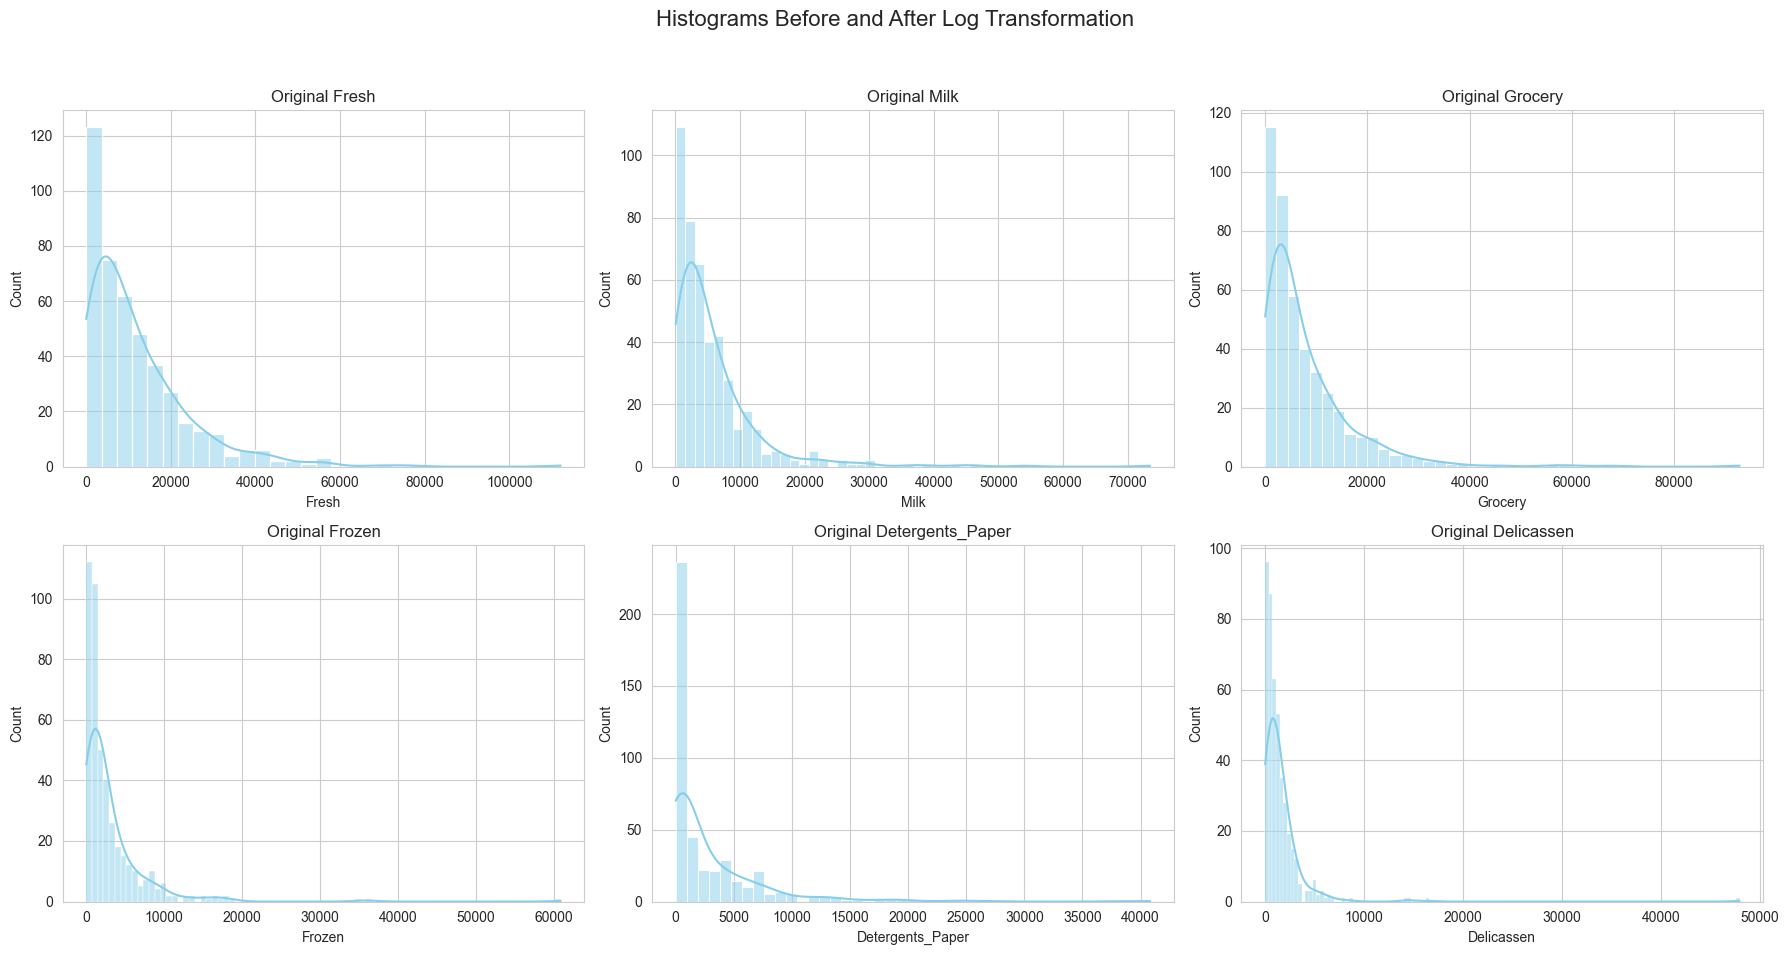

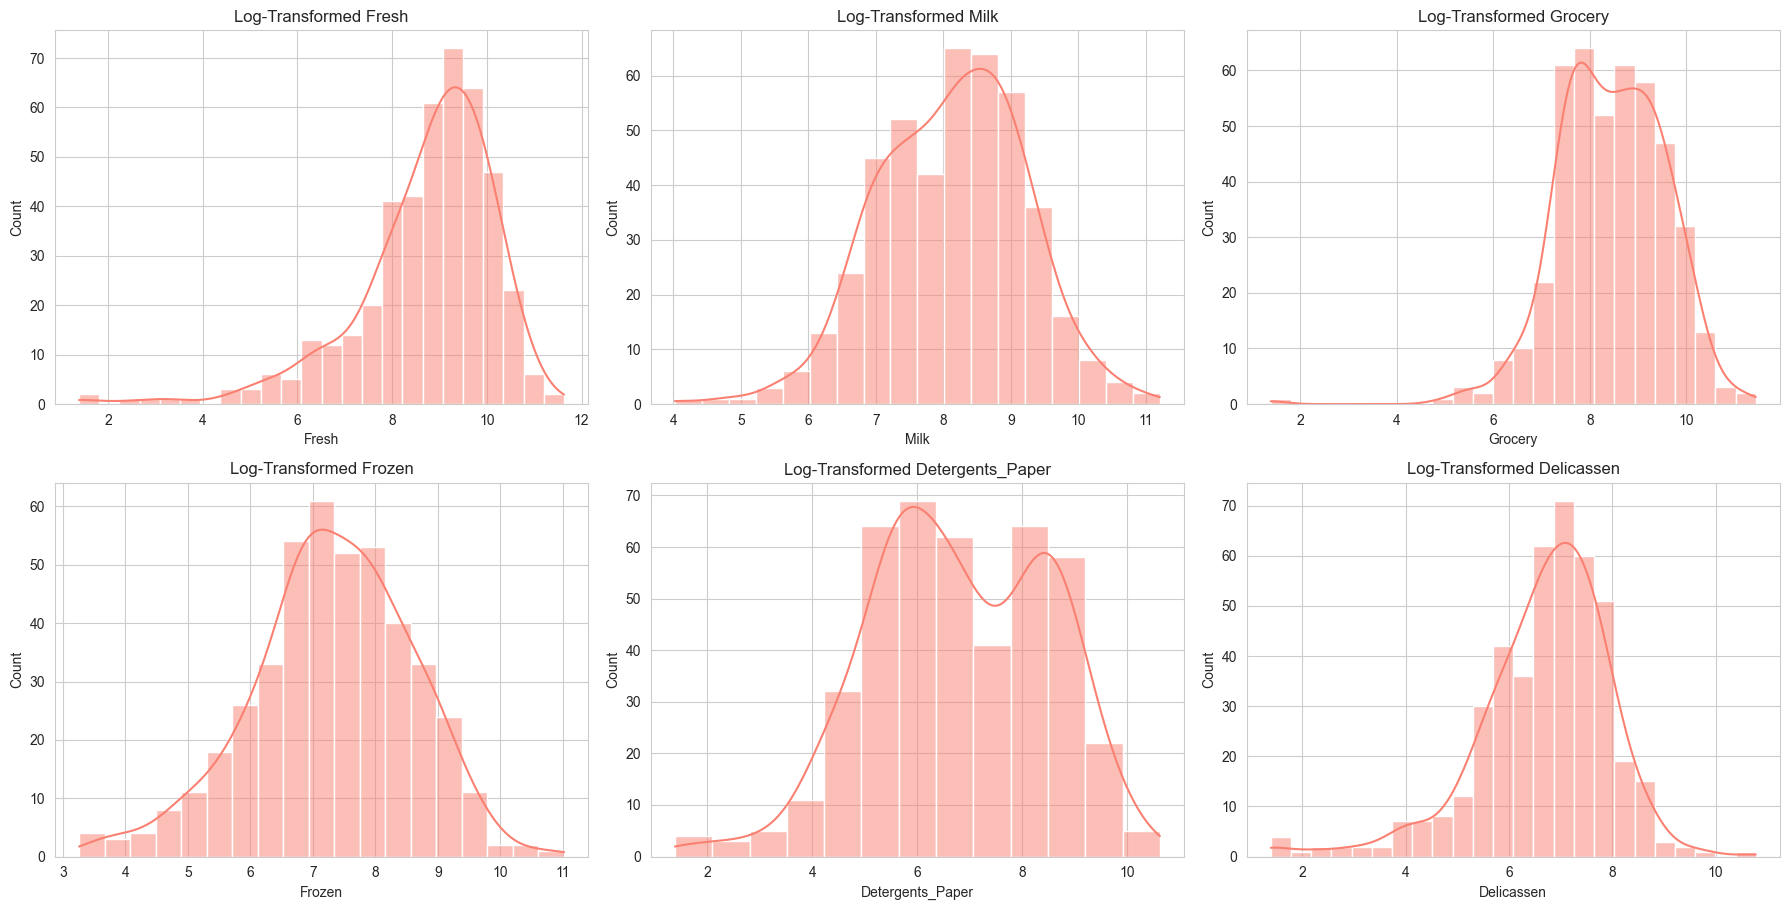

In [26]:
# Apply log transformation
log_df = df[spending_features].apply(np.log1p)

# Plot histograms before and after log transformation
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
fig.suptitle('Histograms Before and After Log Transformation', fontsize=16)

# Before
for i, col in enumerate(spending_features):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue').set_title(f'Original {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# After
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(spending_features):
    sns.histplot(log_df[col], ax=axes[i], kde=True, color='salmon').set_title(f'Log-Transformed {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# We will now scale this log-transformed data for our clustering models
log_scaled_data = scaler.fit_transform(log_df)
log_scaled_df = pd.DataFrame(log_scaled_data, columns=spending_features)

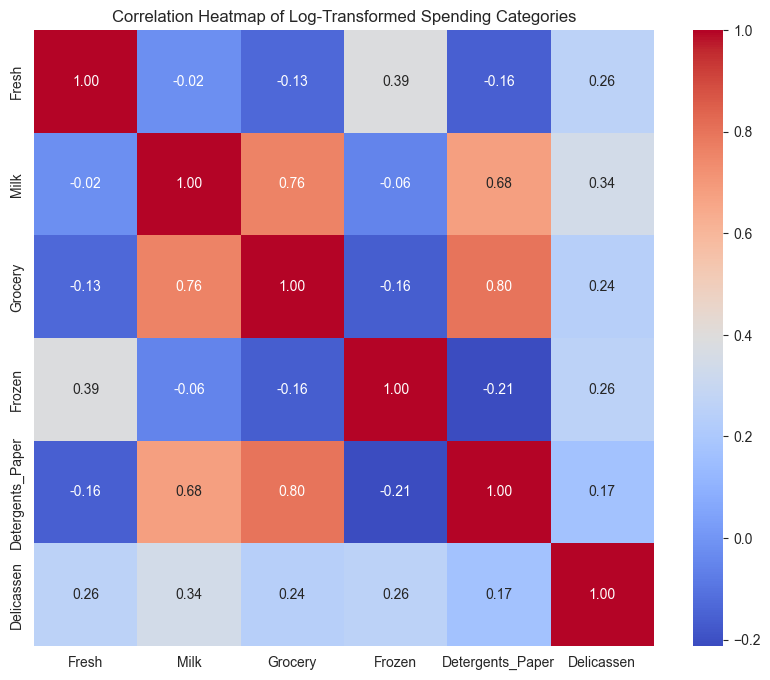

In [27]:
# Calculate correlation matrix on the log-transformed data
corr_matrix = log_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Log-Transformed Spending Categories')
plt.show()

In [28]:
# Create derived features on the original dataframe
df['TotalSpend'] = df[spending_features].sum(axis=1)
df['ProportionFresh'] = df['Fresh'] / df['TotalSpend']
df['LogTotalSpend'] = np.log1p(df['TotalSpend'])

print("Dataframe with new engineered features:")
display(df[['TotalSpend', 'ProportionFresh', 'LogTotalSpend']].head())

Dataframe with new engineered features:


,TotalSpend,ProportionFresh,LogTotalSpend
0,34112,0.371394,10.437434
1,33266,0.212139,10.412321
2,36610,0.173532,10.508104
3,27381,0.484460,10.217641
4,46100,0.490564,10.738590


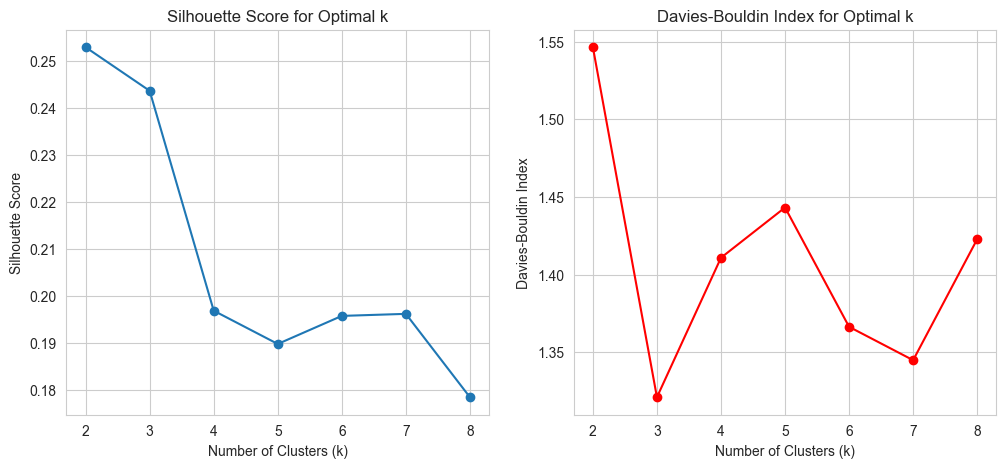

Chosen k for K-means: 2


In [29]:
# Run K-means for k = 2 to 8
k_range = range(2, 9)
silhouette_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(log_scaled_df)
    
    silhouette_scores.append(silhouette_score(log_scaled_df, kmeans.labels_))
    db_scores.append(davies_bouldin_score(log_scaled_df, kmeans.labels_))

# Plot the scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Index for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.show()

# Final K-means model with the best k
best_k = 2 # Based on the plots (highest silhouette, lowest DB)
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_final.fit_predict(log_scaled_df)
print(f"Chosen k for K-means: {best_k}")

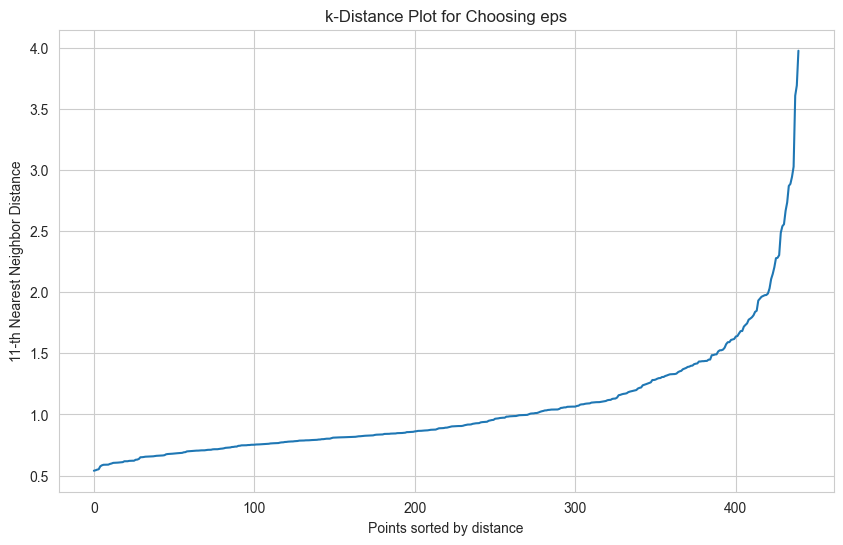

In [30]:
# Calculate k-distance plot
min_samples = 2 * len(log_scaled_df.columns) # 12
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(log_scaled_df)
distances, indices = neighbors_fit.kneighbors(log_scaled_df)

# Sort distances and plot
sorted_distances = np.sort(distances[:, min_samples-1])
plt.plot(sorted_distances)
plt.title('k-Distance Plot for Choosing eps')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples-1}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

 Running DBSCAN Parameter Search 
eps=1.0, min_samples=10: Found 1 clusters and 74 noise points.
eps=1.0, min_samples=12: Found 1 clusters and 82 noise points.
eps=1.0, min_samples=15: Found 1 clusters and 96 noise points.
eps=1.2, min_samples=10: Found 1 clusters and 44 noise points.
eps=1.2, min_samples=12: Found 1 clusters and 44 noise points.
eps=1.2, min_samples=15: Found 1 clusters and 48 noise points.
eps=1.5, min_samples=10: Found 1 clusters and 18 noise points.
eps=1.5, min_samples=12: Found 1 clusters and 20 noise points.
eps=1.5, min_samples=15: Found 1 clusters and 21 noise points.


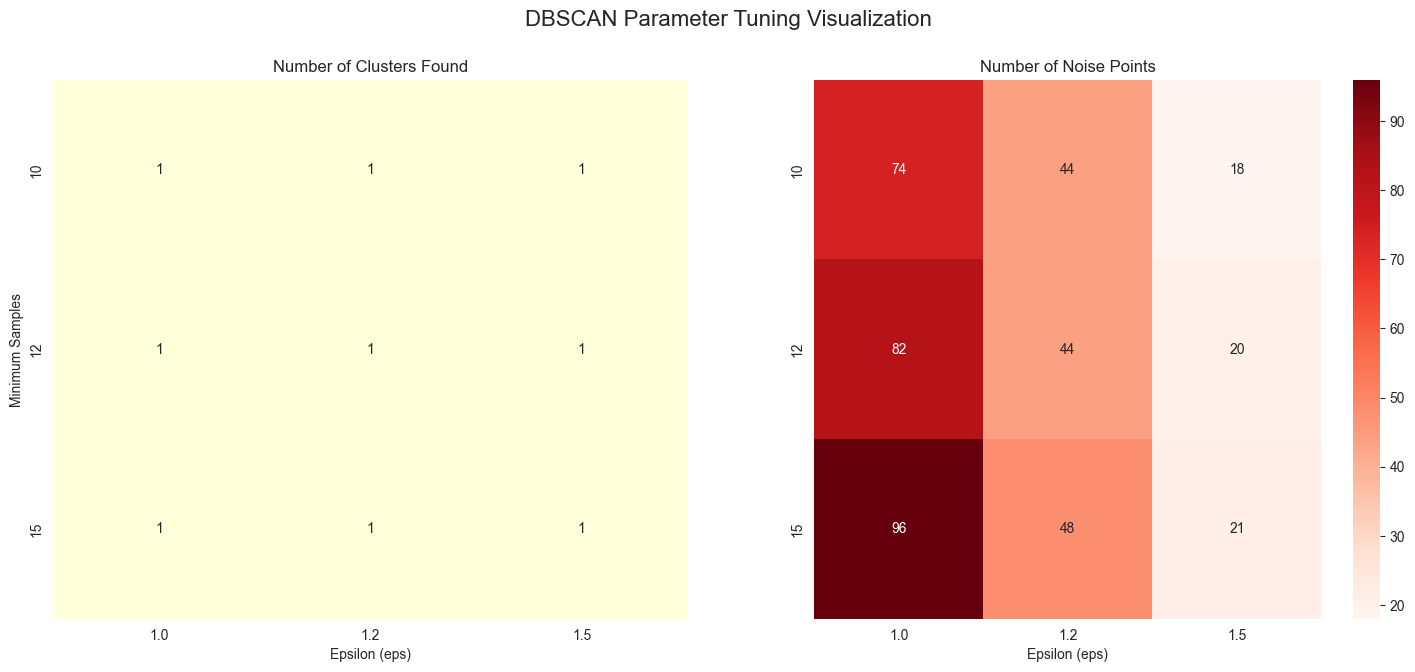


# Based on the plots, we choose eps=1.2 and min_samples=12 as a good balance.

Final DBSCAN cluster assignments have been added to the DataFrame.


In [31]:
# --- Parameter Search and Data Collection ---
eps_values = [1.0, 1.2, 1.5]
min_samples_values = [10, 12, 15]

# Store results in a list to plot later
results = []

print(" Running DBSCAN Parameter Search ")
for eps in eps_values:
    for min_s in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        clusters = dbscan.fit_predict(log_scaled_df)
        
        # Calculate number of clusters and noise points
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        
        # Print the text output as before
        print(f"eps={eps}, min_samples={min_s}: Found {n_clusters} clusters and {n_noise} noise points.")
        
        # Store results for plotting
        results.append({
            'eps': eps,
            'min_samples': min_s,
            'n_clusters': n_clusters,
            'n_noise': n_noise
        })
# Convert results to a DataFrame for easy pivoting
results_df = pd.DataFrame(results)

# Create a figure with two subplots (one for clusters, one for noise)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('DBSCAN Parameter Tuning Visualization', fontsize=16)

# Heatmap 1: Number of Clusters
try:
    cluster_pivot = results_df.pivot(index='min_samples', columns='eps', values='n_clusters')
    sns.heatmap(cluster_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=ax1, cbar=False)
    ax1.set_title('Number of Clusters Found')
    ax1.set_xlabel('Epsilon (eps)')
    ax1.set_ylabel('Minimum Samples')
except Exception as e:
    ax1.set_title(f"Could not plot clusters: {e}")

# Heatmap 2: Number of Noise Points
try:
    noise_pivot = results_df.pivot(index='min_samples', columns='eps', values='n_noise')
    sns.heatmap(noise_pivot, annot=True, fmt='d', cmap='Reds', ax=ax2)
    ax2.set_title('Number of Noise Points')
    ax2.set_xlabel('Epsilon (eps)')
    ax2.set_ylabel('') 
except Exception as e:
    ax2.set_title(f"Could not plot noise: {e}")

plt.show()
print("\n# Based on the plots, we choose eps=1.2 and min_samples=12 as a good balance.")
dbscan_final = DBSCAN(eps=1.2, min_samples=12)
df['DBSCAN_Cluster'] = dbscan_final.fit_predict(log_scaled_df)

print("\nFinal DBSCAN cluster assignments have been added to the DataFrame.")

In [32]:
print("--- K-means Clustering Results ---")
print(df['KMeans_Cluster'].value_counts())

print("\n--- DBSCAN Clustering Results ---")
dbscan_counts = df['DBSCAN_Cluster'].value_counts()
print(dbscan_counts)

noise_proportion = (dbscan_counts.get(-1, 0) / len(df)) * 100
print(f"\nDBSCAN Noise Proportion: {noise_proportion:.2f}%")

--- K-means Clustering Results ---
KMeans_Cluster
0    252
1    188
Name: count, dtype: int64

--- DBSCAN Clustering Results ---
DBSCAN_Cluster
 0    396
-1     44
Name: count, dtype: int64

DBSCAN Noise Proportion: 10.00%


In [33]:
# K-means Centroids
kmeans_centroids_scaled_log = kmeans_final.cluster_centers_
kmeans_centroids_log = scaler.inverse_transform(kmeans_centroids_scaled_log)
kmeans_centroids_original = np.expm1(kmeans_centroids_log)
kmeans_centroids_df = pd.DataFrame(kmeans_centroids_original, columns=spending_features)
print("--- K-means Cluster Centroids (Original Annual Spending) ---")
display(kmeans_centroids_df)

# DBSCAN Medoids (more robust to in-cluster outliers)
# Inverse transform the log_df to get original units
dbscan_medoids = log_df.groupby(df['DBSCAN_Cluster']).median()
dbscan_medoids_original = np.expm1(dbscan_medoids)
print("\n--- DBSCAN Cluster Medoids (Original Annual Spending) ---")
display(dbscan_medoids_original)

--- K-means Cluster Centroids (Original Annual Spending) ---


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8665.432570,1755.757443,2310.055738,2136.533776,294.032023,621.799377
1,3961.284688,8048.902754,11802.367220,910.267776,3913.902685,1083.203659



--- DBSCAN Cluster Medoids (Original Annual Spending) ---


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
DBSCAN_Cluster,,,,,,
-1,1912.005489,2763.824949,6625.353899,816.817217,586.465744,129.476051
0,8752.386887,3649.499692,4630.424187,1672.995221,820.499848,1004.489930


In [34]:
# Prepare data for the test
clusters = df['KMeans_Cluster'].unique()
spend_data_by_cluster = [df['TotalSpend'][df['KMeans_Cluster'] == c] for c in clusters]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*spend_data_by_cluster)

print(f"\n Kruskal-Wallis Test for TotalSpend across K-means Clusters ")
print(f"Statistic: {stat:.4f}, p-value: {p_value}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a statistically significant difference in TotalSpend across the clusters.")
else:
    print("Result: Fail to reject the null hypothesis. There is no statistically significant difference in TotalSpend across the clusters.")

 
# Chi-Square test for Channel
contingency_channel = pd.crosstab(df['KMeans_Cluster'], df['Channel'])
chi2, p, _, _ = chi2_contingency(contingency_channel)
print("\n Chi-Square Test for Association between K-means Cluster and Channel ")
print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p}")
if p < 0.05:
    print("Result: Reject the null hypothesis. There is a significant association between cluster and Channel.")
else:
    print("Result: Fail to reject the null hypothesis. No significant association found.")
display(contingency_channel)


# Chi-Square test for Region
contingency_region = pd.crosstab(df['KMeans_Cluster'], df['Region'])
chi2, p, _, _ = chi2_contingency(contingency_region)
print("\n Chi-Square Test for Association between K-means Cluster and Region ")
print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p}")
if p < 0.05:
    print("Result: Reject the null hypothesis. There is a significant association between cluster and Region.")
else:
    print("Result: Fail to reject the null hypothesis. No significant association found.")
display(contingency_region)


 Kruskal-Wallis Test for TotalSpend across K-means Clusters 
Statistic: 91.9687, p-value: 8.80591608956216e-22
Result: Reject the null hypothesis. There is a statistically significant difference in TotalSpend across the clusters.

 Chi-Square Test for Association between K-means Cluster and Channel 
Chi-Square Statistic: 219.2168, p-value: 1.3403749505512567e-49
Result: Reject the null hypothesis. There is a significant association between cluster and Channel.


Channel,1,2
KMeans_Cluster,,
0,243,9
1,55,133



 Chi-Square Test for Association between K-means Cluster and Region 
Chi-Square Statistic: 1.2299, p-value: 0.5406646464715372
Result: Fail to reject the null hypothesis. No significant association found.


Region,1,2,3
KMeans_Cluster,,,
0,48,28,176
1,29,19,140


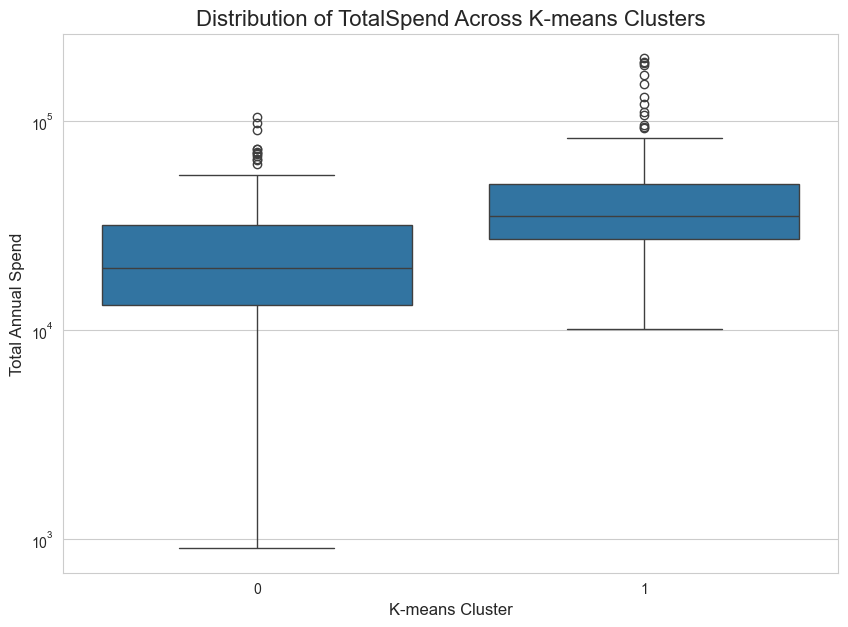

In [ ]:
# Plotting for the Kruskal-Wallis Test 
plt.figure(figsize=(10, 7))

# Create a boxplot to compare the distribution of TotalSpend across the K-means clusters
sns.boxplot(x='KMeans_Cluster', y='TotalSpend', data=df)

plt.title('Distribution of TotalSpend Across K-means Clusters', fontsize=16)
plt.xlabel('K-means Cluster', fontsize=12)
plt.ylabel('Total Annual Spend', fontsize=12)
plt.yscale('log') # Use a log scale for the y-axis because spending is highly skewed
plt.show()

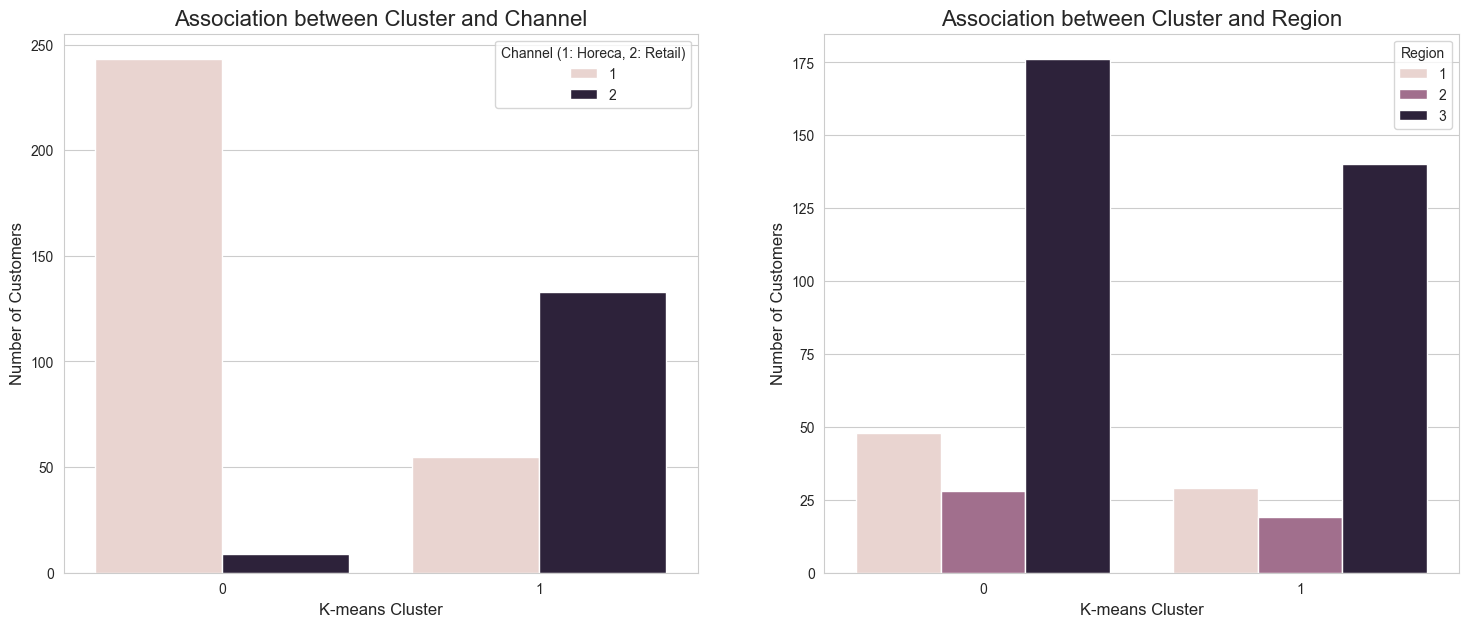

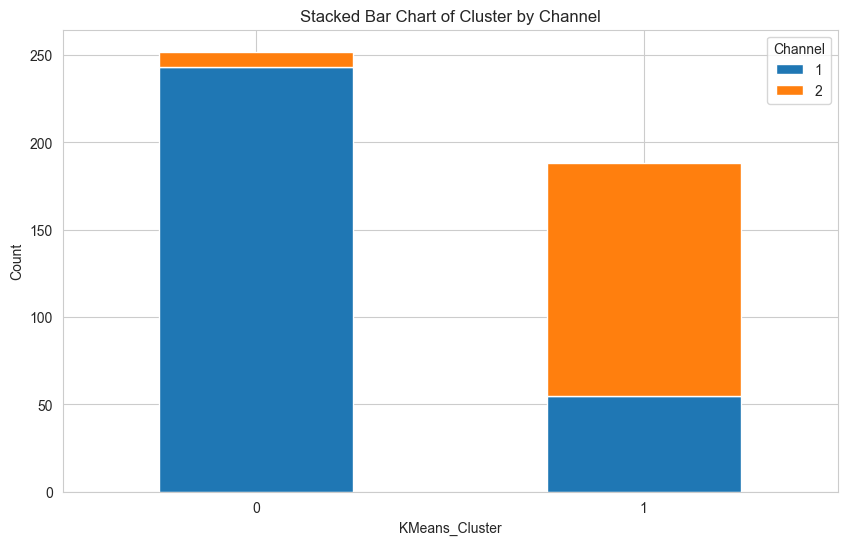

In [ ]:
#  Plotting for the Chi-Square Tests 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Cluster vs. Channel 
# The Chi-Square test was highly significant, so we expect a strong pattern here.
sns.countplot(x='KMeans_Cluster', hue='Channel', data=df, ax=ax1)
ax1.set_title('Association between Cluster and Channel', fontsize=16)
ax1.set_xlabel('K-means Cluster', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.legend(title='Channel (1: Horeca, 2: Retail)')


# Plot 2: Cluster vs. Region 
# The Chi-Square test was not significant, so we expect the distributions to look similar.
sns.countplot(x='KMeans_Cluster', hue='Region', data=df, ax=ax2)
ax2.set_title('Association between Cluster and Region', fontsize=16)
ax2.set_xlabel('K-means Cluster', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.legend(title='Region')

plt.show()

# You can also directly plot the contingency table for a clearer view of proportions
contingency_channel.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Cluster by Channel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

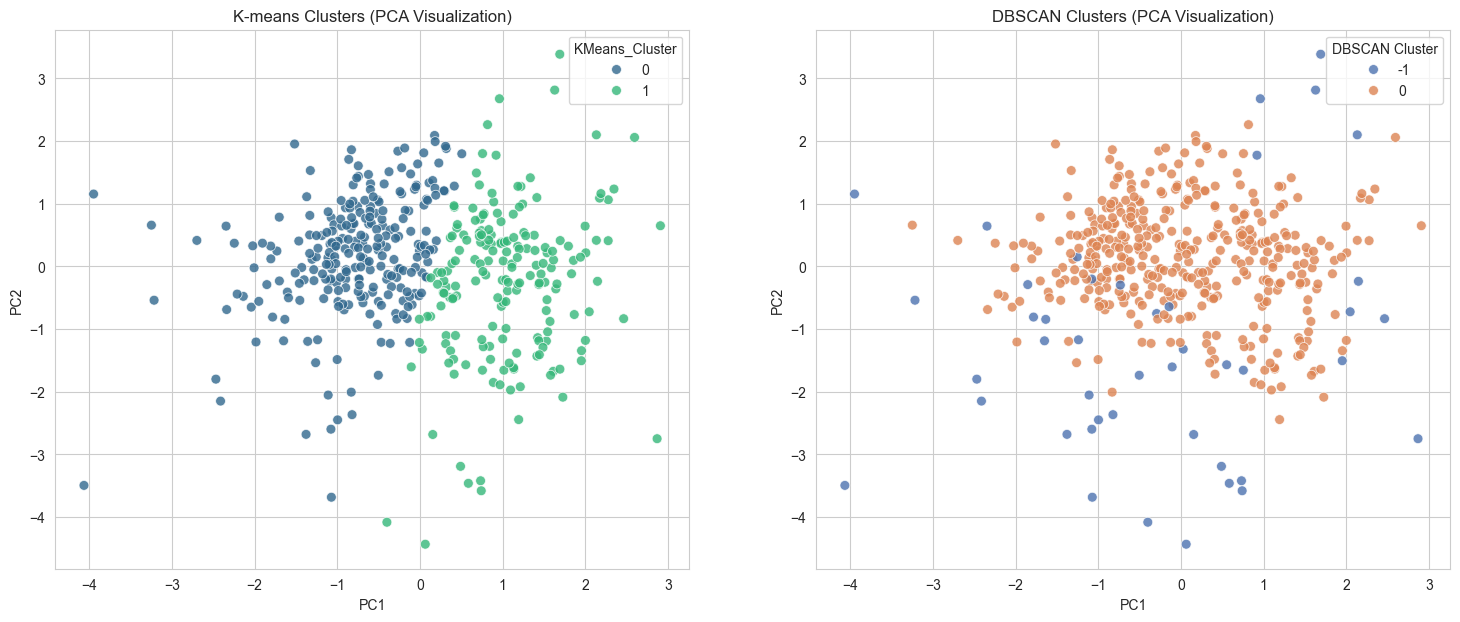

In [35]:
# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(log_scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Add cluster labels to the PCA dataframe
pca_df['KMeans_Cluster'] = df['KMeans_Cluster']
pca_df['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# K-means Plot
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis', ax=ax1, s=50, alpha=0.8)
ax1.set_title('K-means Clusters (PCA Visualization)')

# DBSCAN Plot
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='deep', ax=ax2, s=50, alpha=0.8)
ax2.set_title('DBSCAN Clusters (PCA Visualization)')
ax2.legend(title='DBSCAN Cluster')
plt.show()